In [8]:
import matplotlib.pyplot as plt
import pathlib
import json
import albumentations as A
import numpy as np
from PIL import Image
import torch
from torchvision.models.detection.transform import GeneralizedRCNNTransform
from pytorch_faster_rcnn_tutorial.datasets import ObjectDetectionDataSet
from pytorch_faster_rcnn_tutorial.transformations import ComposeDouble, Clip, AlbumentationWrapper, FunctionWrapperDouble
from pytorch_faster_rcnn_tutorial.transformations import normalize_01
from pytorch_faster_rcnn_tutorial.utils import get_filenames_of_path, collate_single, stats_dataset
from pytorch_faster_rcnn_tutorial.visual import DatasetViewer, DatasetViewerSingle

In [2]:
#root directory
root = pathlib.Path('pytorch_faster_rcnn_tutorial/data/shelves')

#input and target files
inputs = get_filenames_of_path(root / 'input')
targets = get_filenames_of_path(root / 'target')

inputs.sort()
targets.sort()

#mapping
mapping = {
    'region': 1,
}

In [3]:
#transformations and augmentations --> look into which one to use
transforms = ComposeDouble([
    Clip(),
    # AlbumentationWrapper(albumentation=A.HorizontalFlip(p=0.5)),
    # AlbumentationWrapper(albumentation=A.RandomScale(p=0.5, scale_limit=0.5)),
    # AlbuWrapper(albu=A.VerticalFlip(p=0.5)),
    FunctionWrapperDouble(np.moveaxis, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01)
])

In [4]:
# create dataset
dataset = ObjectDetectionDataSet(inputs=inputs,
                                 targets=targets,
                                 transform=transforms,
                                 use_cache=False,
                                 convert_to_format=None,
                                 mapping=mapping)

In [9]:
# rcnn transform
transform = GeneralizedRCNNTransform(min_size=int(1024),
                                     max_size=int(1024),
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])


In [7]:
color_mapping = {
    1: 'red',
}

datasetviewer = DatasetViewer(dataset, color_mapping, rccn_transform=None)
datasetviewer.napari()

/Users/wandermarijnissen/my_venvs/project1_venv/lib/python3.8/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)
Exception in callback BaseAsyncIOLoop._handle_events(120, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(120, 1)>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/wandermarijnissen/my_venvs/project1_venv/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/Users/wandermarijnissen/my_venvs/project1_venv/lib/python3.8/site-packages/zmq/eventloop/zmqstream.py", line 452, in _handle_events
    self._handle_recv()
  File "/Users/wandermarijnissen/my_venvs/project1_venv/lib/python3.8/site-packages/zmq/eventloop/zmqstream.py", line 481, in _handle_recv
  

In [10]:
stats_transform = stats_dataset(dataset, transform)

In [11]:
print("bounding box min, max, average:")
print("height: " + str(torch.min(stats_transform["boxes_height"]).item()) + ", " + str(torch.max(stats_transform["boxes_height"]).item()) + ", " + str(torch.mean(stats_transform["boxes_height"]).item()))
print("width: " + str(torch.min(stats_transform["boxes_width"]).item()) + ", " + str(torch.max(stats_transform["boxes_width"]).item()) + ", " + str(torch.mean(stats_transform["boxes_width"]).item()))
print("area: " + str(torch.min(stats_transform["boxes_area"]).item()) + ", " + str(torch.max(stats_transform["boxes_area"]).item()) + ", " + str(torch.mean(stats_transform["boxes_area"]).item()))


bounding box min, max, average:
height: 8.0284423828125, 767.2000122070312, 84.97798919677734
width: 10.271392822265625, 690.517578125, 102.17707061767578
area: 402.93475341796875, 191102.046875, 9585.3466796875


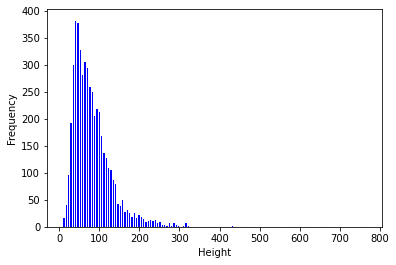

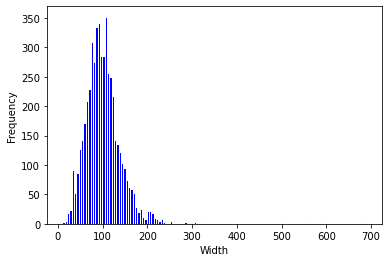

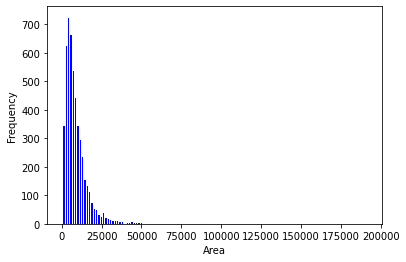

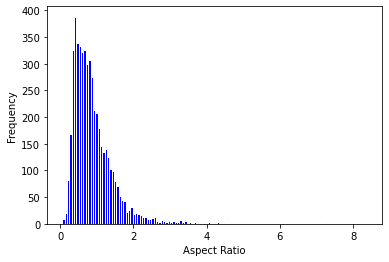

In [42]:
bins = 130
#plot height
plt.hist(stats_transform["boxes_height"].numpy(), color = 'blue', edgecolor = 'white',
         bins=bins)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

#plot width
plt.hist(stats_transform["boxes_width"].numpy(), color = 'blue', edgecolor = 'white',
         bins=bins)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

#plot area
plt.hist(stats_transform["boxes_area"].numpy(), color = 'blue', edgecolor = 'white',
         bins=bins)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

#plot aspect ratios
plt.hist(aspect_ratios, color = 'blue', edgecolor = 'white',
         bins=bins)
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#check image sizes
min_imheight = min_imwidth = min_imarea = 100000000
max_imheight = max_imwidth = max_imarea = 0
min_area_image = max_area_image = 0
average_imheigth = average_imwidth = average_imarea = 0

for i in range(len(inputs)):
    im = Image.open(inputs[i])
    width,height = im.size
    area = width*height
    average_imwidth += width/len(inputs)
    average_imheigth += height/len(inputs)
    average_imarea += area/len(inputs)
    if width > max_imwidth:
        max_imwidth = width
    elif width < min_imwidth:
        min_imwidth = width
    if height > max_imheight:
        max_imheight = height 
    elif height < min_imheight:
        min_imheight = height
    if area > max_imarea:
        max_imarea = area
        max_area_image = i
    elif area < min_imarea:
        min_imarea = area
        min_area_image = i

min_im = Image.open(inputs[min_area_image])
width,height = min_im.size
min_dimensions = width,height

#print summary stats
print("max image height: " + str(max_imheight))
print("min image height: " + str(min_imheight))
print("average image heigth: " + str(average_imheigth))
print("max image width: " + str(max_imwidth))
print("min image width: " + str(min_imwidth))
print("average image width: " + str(average_imwidth))
print("max image size: " + str(max_imarea)  + str(Image.open(inputs[max_area_image]).size))
print("min image size: " + str(min_imarea) + str(Image.open(inputs[min_area_image]).size))
print("average image size: " + str(average_imarea))

In [29]:
#accumalate summary statistics
number_regions = 0
max_number_regions = 0
min_number_regions = 1000

#also check at which images this occurs
max_regions_image = 0
min_regions_image = 0

directory = os.getcwd() + "/pytorch_faster_rcnn_tutorial/data/shelves/target"
for i in range(len(targets)):
    t = targets[i]
    t_f = open(t)
    t_data = json.load(t_f)
    annotation = t_data
    number_regions += len(annotation["labels"])
    if len(annotation["labels"]) > max_number_regions:
        max_number_regions = len(annotation["labels"])
        max_regions_image = i
    if len(annotation["labels"]) < min_number_regions:
        min_number_regions = len(annotation["labels"])
        min_regions_image = i

In [ ]:
#count number of images, total number of regions, average number of regions per picture, max #regions per picture, min #regions per picture
print("some more summary statistics:")
print("number of images: " + str(len(targets)))
print("total number of regions: " + str(number_regions))
print("avg number of regions: " + str(number_regions/len(targets)))
print("max number of regions: " + str(max_number_regions) + " at " + str(max_regions_image))
print("min number of regions: " + str(min_number_regions) + " at " + str(min_regions_image))

In [32]:
#statistics on bounding boxes
max_width = max_height = max_aspect_ratio = max_area = 0
min_width = min_height = min_aspect_ratio = min_area = 100000

#also check which boxes are the extreme for examples
max_width_box = max_height_box = min_width_box = min_height_box = min_aspect_ratio_box = max_aspect_ratio_box = min_area_box = max_area_box = average_height = average_width = average_aspect_ratio = 0
average_area = 0
aspect_ratios = []

for i in range(len(targets)):
    t = targets[i]
    t_f = open(t)
    annotation = json.load(t_f)
    for j in range(len(annotation["boxes"])):
        box = annotation["boxes"][j]
        width = box[2]-box[0]
        height = box[3]-box[1]
        area = width*height
        aspect_ratio = width/height
        average_height += height/number_regions
        average_width += width/number_regions
        average_aspect_ratio += aspect_ratio/number_regions
        average_area += area/number_regions
        if width > max_width:
            max_width = width
            max_width_box = i,j
        elif width < min_width:
            min_width = width
            min_width_box = i,j
        if height > max_height:
            max_height = height
            max_height_box = i,j
        elif height < min_height:
            min_height = height
            min_height_box = i,j
        aspect_ratios.append(aspect_ratio)
        if aspect_ratio > max_aspect_ratio:
            max_aspect_ratio = aspect_ratio
            max_aspect_ratio_box = i,j
        elif aspect_ratio < min_aspect_ratio:
            min_aspect_ratio = aspect_ratio
            min_aspect_ratio_box = i,j
        if area > max_area:
            max_area = area
            max_area_box = i,j
        elif area < min_area:
            min_area = area
            min_area_box = i,j
    

In [31]:
#summary stats extended (location i,j meaning bounding box i-1 in image j-1)
print("some more summary statistics:")
print("min height: " + str(min_height) + " at " + str(min_height_box))
print("max height: " + str(max_height) + " at " + str(max_height_box))
print("average height: " + str(average_height))
print("min width: " + str(min_width) + " at " + str(min_width_box))
print("max width: " + str(max_width) + " at " + str(max_width_box))
print("average width: " + str(average_width))
print("min area: " + str(min_area) + " at " + str(min_area_box))
print("max area: " + str(max_area) + " at " + str(max_area_box))
print("average area: " + str(average_area))
print("min aspect ratio: " +str(min_aspect_ratio) + " at " + str(min_aspect_ratio_box))
print("max aspect ratio: " + str(max_aspect_ratio) + " at " + str(max_aspect_ratio_box))
print("average aspect ratio: " + str(average_aspect_ratio))


some more summary statistics:
min height: 36.0 at (51, 17)
max height: 2029.0 at (96, 0)
average height: 278.12313988010766
min width: 21.0 at (44, 31)
max width: 2097.0 at (3, 0)
average width: 238.46537968399883
min area: 4826.0 at (4, 71)
max area: 1786785.0 at (8, 0)
average area: 73768.36260456972
min aspect ratio: 0.06382765531062198 at (42, 36)
max aspect ratio: 8.37344398340249 at (51, 34)
average aspect ratio: 0.8981627995936474


In [ ]:
#check a specific bounding box label
t = targets[51]
t_f = open(t)
annotation = json.load(t_f)
box = annotation["boxes"][34]
box

In [ ]:
#used to inspect anchors --> weird thing: axes seem to flip
from torchvision.models.detection.transform import GeneralizedRCNNTransform
from pytorch_faster_rcnn_tutorial.visual import AnchorViewer

transform = GeneralizedRCNNTransform(min_size=1024,
                                     max_size=1024,
                                     image_mean=[0.485, 0.456, 0.406],
                                     image_std=[0.229, 0.224, 0.225])

image = dataset[14]['x']  # ObjectDetectionDataSet
feature_map_size = (4000, 32, 32)
anchorviewer = AnchorViewer(image=image,
                            rcnn_transform=transform,
                            feature_map_size=feature_map_size,
                            anchor_size=((64, 128, 256, 512),),
                            aspect_ratios=((0.5,1.0,2.0,),)
                            )
anchorviewer.napari()